# NLP 목표

* 네 가지 방법을 통하여 다방면으로 분석을 진행해 볼 것이다.
    
### 1. Word Cloud
     * Text에서 나온 단어의 빈도수를 확인 해 Word Cloud로 컨텐츠의 중요 단어를 파악할 수 있다
     * Mask를 적용하여 특색있게 나타낼 수 있다
     
### 2. Tokenizing
    * 신조어, 고유명사가 많은 SNS의 특성상 기존의 KoNLP로 유효한 단어를 구분하기 어려운 부분이 있다
    * 문맥을 파악하여 Tokenizing을 제공하는 비지도 학습인 SoyNLP를 적용하여 Word2Vec을 하기 위한 Tokenizing을 진행한다
    * SoyNLP를 이용해 추출한 명사로 다시 한 번 Word Cloud를 그려본다

### 3. Word Embedding
    * 단어 간의 관계를 파악하는 Word Embedding을 이용하여 유사한 단어를 파악할 수 있다
    * Tsne를 통해 비슷한 단어를 한 눈에 볼 수 있도록 시각화 한다
    
### 4. LDA
    * 숨겨진 (latent) 레이어를 이용하여 컨텐츠의 주제를 파악해 볼 수 있다
    * 추출된 주제의 연과된 단어를 시각화를 통해 쉽게 파악할 수 있다

In [88]:
import pickle

v30 = pickle.load(open('pickle/v30', 'rb'))
note8 = pickle.load(open('pickle/note8', 'rb'))
# 피클 파일 읽어오기

In [89]:
# 계산 시간 구하기
from time import time

def check_time(t0):
    dur = time() - t0
    print ("계산에 걸린시간 : {:.3f} 초 \n".format(dur))

In [90]:
# list to text
def list_to_text(list_contents, file_name):
    file_path = 'text_file/'+ file_name+'.txt'
   
    with open(file_path, 'w') as f:
        for text in list_contents:
            f.write(text + '\n')

In [91]:
# 그래프 한글 폰트
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

In [92]:
v30.tail()

,id,sns_text
779,BlueSeanSan,갤노트8 30 아이폰…정면 승부 7 스마트폰 대전 신 삼국지三國志 삼성 아이...
780,DREAM_MD,전자의 기대작 30 국민체험단 모집 출처 지효대디 1 블로그
781,A7aLolo,415 국민의당 지지율 30 출고 서울 여행 덕질은라이트처럼 10주년 기념 비투...
782,tnqls119,현장 `갤노트8 40만 원 30 27만 원` 불법페이백 여전히 기승
783,shim5724,39갤노트8 나와39 30 가성비로 승부수…64 94만9300원 04 그놈의 호평...


In [93]:
note8.tail()

,id,sns_text
933,indigo_93,노트8 이랍니닷
934,jx464,삼성노트8로 그림 그리다 열불 오른쪽엔 거의 터치가안되서 안그려짐 44
935,yowasizi,헉 그런가요 노트처럼 펜이 내장되어 있는건줄 알았구큐 애플 제품을 써본 적이 없어...
936,_Tantei,아니 나 첨에 아빠가 뭔폰갖고싶냐고했을때 지금쓰는거 57인치보다 큰폰이면된다고햇거든...
937,_Tantei,나 오늘 아빠가 택배로 보내준 폰받앗는데 아니 노트8이야 존나비싼건...


* 정규처리 하는 과정에서 띄어쓰기가 각자 달라져서 한칸 초과의 띄어쓰기는 하나로 줄인다

In [94]:
import numpy as np
import re

In [95]:
# 긴 공백을 띄어쓰기 한 칸으로 바꾸기
# 내용에 숫자가 의미 없을 것 같아서 숫자도 제외
def remove_space(contents):
    array_contents = np.array(contents.sns_text)
    remove_text = [re.sub(r'\d+', '', i)for i in array_contents]
    remove_text = [re.sub(r'\s+', " ", i) for i in remove_text]
    
    return remove_text

    

In [96]:
v30_remove = remove_space(v30)
note8_remove = remove_space(note8)

In [97]:
# str로 변경 함수
from functools import reduce

def change_str(model):
    return reduce(lambda x, y: x+y, model)

In [98]:
# str 로 변경
from functools import reduce
v30_str = change_str(v30_remove)
note8_str = change_str(note8_remove)

# 1. Word Cloud

## 1) Konlpy의 twitter 를 이용한 성분분석


In [99]:
from konlpy.tag import Twitter
tw=Twitter()

### 형태소 분석 및 토크나이징

In [100]:
v30_pos = tw.pos(v30_str)
v30_pos[:10]


[('야마가타', 'Noun'),
 ('대학', 'Noun'),
 ('의', 'Josa'),
 ('강점', 'Noun'),
 ('은', 'Josa'),
 ('올', 'NounPrefix'),
 ('레드', 'Noun'),
 ('나스카', 'Noun'),
 ('지상화', 'Noun'),
 ('암', 'Noun')]

In [101]:
note8_pos = tw.pos(note8_str)
note8_pos[:10]


[('후', 'Noun'),
 ('노트', 'Noun'),
 ('계약', 'Noun'),
 ('하고', 'Josa'),
 ('왔', 'Verb'),
 ('다', 'Eomi'),
 ('기기', 'Noun'),
 ('가', 'Josa'),
 ('매장', 'Noun'),
 ('에', 'Josa')]

## 2) Word Cloud를 그리기 위한 명사 추출

In [102]:
# 명사 중 글자수1개와, stop words에 있는 단어는 추려낸다
# stop word : 공통적으로 있을 것 같은 스마트폰, 전자,/ 마케팅 단어
# '노트'라는 단어가 극단적으로 많기에 제외한다
def word_filter(contents):
    nouns = tw.nouns(contents)
    stop_words = open('text_file/stop_words.txt', mode = 'r',\
                      encoding='utf-8').read().split('\n')
    filter_nouns = [noun for noun in nouns if len(noun)> 1 and \
                 noun not in stop_words]
    return filter_nouns
    

In [103]:
v30_filter = word_filter(v30_str)
note8_filter = word_filter(note8_str)




In [104]:
import numpy as np

np.unique(v30_filter)

array(['가가', '가격', '가기', ..., '히든', '히트', '힐링'],
      dtype='<U6')

## 3) NLTK
* nltk 패키지를 이용하여 많이 나오는 단어의 빈도수를 확인 할 수 있다

In [105]:
import nltk
import pprint as pp

In [106]:
def check_count_pos(model_name, pos):
    text = nltk.Text(pos, name = 'NMSC')
    print ('모델명: {}'.format(model_name))
    print ("토큰의 개수 : {}".format(len(text.tokens)))
    print ("unique 토큰의 개수 : {}".format(len(set(text.tokens))))
    print("상위 50개 빈도의 단어 : ")
    pp.pprint(text.vocab().most_common(50))
    
    print("Plot Chart")
    
    plt.figure(figsize = (20, 10))
    plt.rcParams.update({'font.size':20})
    text.plot(50)

모델명: v30
토큰의 개수 : 6312
unique 토큰의 개수 : 1869
상위 50개 빈도의 단어 : 
[('갤럭시', 122),
 ('뉴스', 103),
 ('카메라', 93),
 ('출처', 69),
 ('아이폰', 67),
 ('트와이스', 56),
 ('블락비', 50),
 ('촬영', 48),
 ('영상', 48),
 ('구글', 47),
 ('기능', 46),
 ('만원', 44),
 ('동영상', 43),
 ('비디오', 43),
 ('체험', 43),
 ('비교', 41),
 ('공개', 40),
 ('네이버', 38),
 ('사진', 37),
 ('블로그', 35),
 ('공유', 35),
 ('세로', 35),
 ('가격', 33),
 ('광고', 33),
 ('모두', 33),
 ('뮤비', 32),
 ('리뷰', 30),
 ('미국', 30),
 ('국내', 27),
 ('픽셀', 26),
 ('바이올렛', 25),
 ('사운드', 24),
 ('개봉', 24),
 ('플러스', 24),
 ('라벤더', 22),
 ('이번', 22),
 ('디스플레이', 21),
 ('후기', 21),
 ('모델', 21),
 ('다른', 21),
 ('디자인', 21),
 ('필름', 21),
 ('스펙', 21),
 ('전략', 21),
 ('가지', 20),
 ('음질', 19),
 ('프리미엄', 19),
 ('출고', 19),
 ('승부', 19),
 ('시장', 19)]
Plot Chart


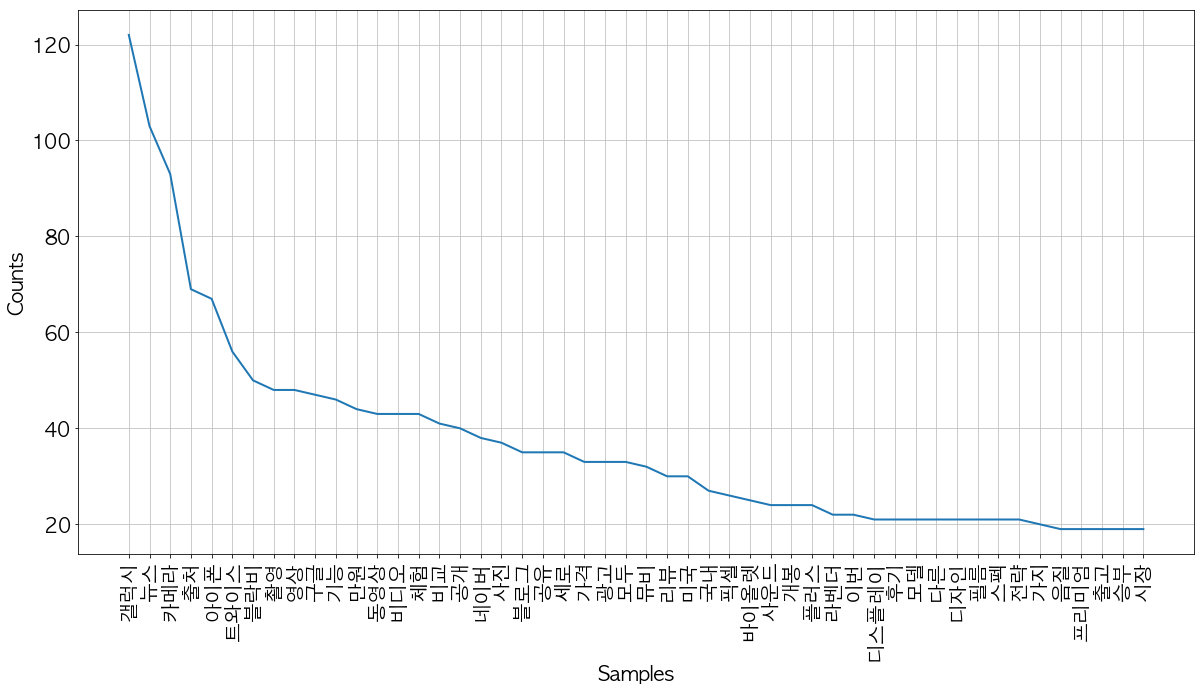

In [107]:
# V30
check_count_pos('v30',v30_filter)

모델명: note8
토큰의 개수 : 4779
unique 토큰의 개수 : 1976
상위 50개 빈도의 단어 : 
[('갤럭시', 179),
 ('아이폰', 95),
 ('화이트', 54),
 ('스톤', 51),
 ('너무', 41),
 ('강화유리', 39),
 ('케이스', 35),
 ('기능', 34),
 ('글라스', 33),
 ('출처', 33),
 ('액정', 30),
 ('진짜', 28),
 ('번역', 28),
 ('블로그', 26),
 ('오늘', 25),
 ('사진', 25),
 ('아직', 24),
 ('카메라', 24),
 ('고객', 23),
 ('그냥', 23),
 ('만원', 23),
 ('그림', 22),
 ('배터리', 22),
 ('지금', 21),
 ('사람', 20),
 ('최고', 20),
 ('화면', 20),
 ('보호', 19),
 ('개통', 18),
 ('느낌', 17),
 ('고민', 15),
 ('엣지', 15),
 ('뉴스', 15),
 ('핸드폰', 15),
 ('하나', 15),
 ('보고', 14),
 ('계속', 14),
 ('스타', 14),
 ('시간', 14),
 ('빅스', 14),
 ('아마존', 14),
 ('미국', 14),
 ('맥북', 14),
 ('어제', 13),
 ('이번', 13),
 ('때문', 13),
 ('후기', 13),
 ('노래', 13),
 ('가격', 13),
 ('화질', 13)]
Plot Chart


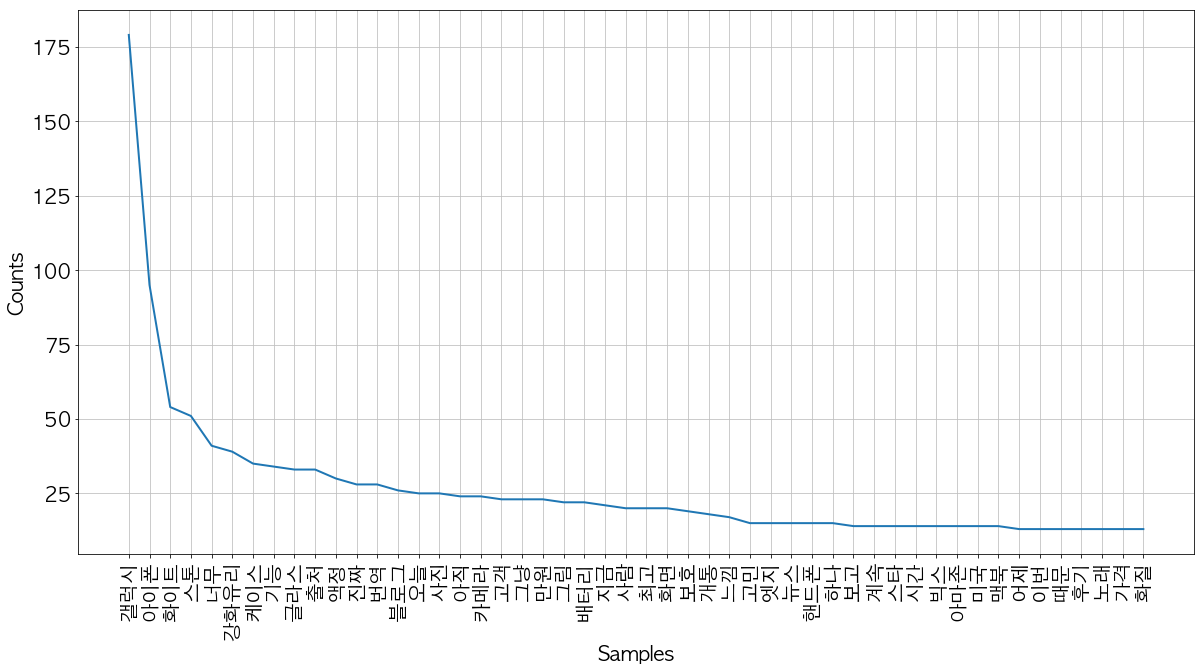

In [108]:
# note8
check_count_pos('note8',note8_filter)

## 4)워드 클라우드

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
font_file = 'font/210 직장인의한마디R.ttf'
WC = WordCloud(font_path = font_file,\
              max_words = 2000)
#, width = 300, height = 300

In [110]:
def draw_wordcloud(contents):
    cloud_phone = WC.generate(' '.join(contents))
    
    plt.figure(figsize = (20, 20))
    plt.imshow(cloud_phone)
    plt.show()


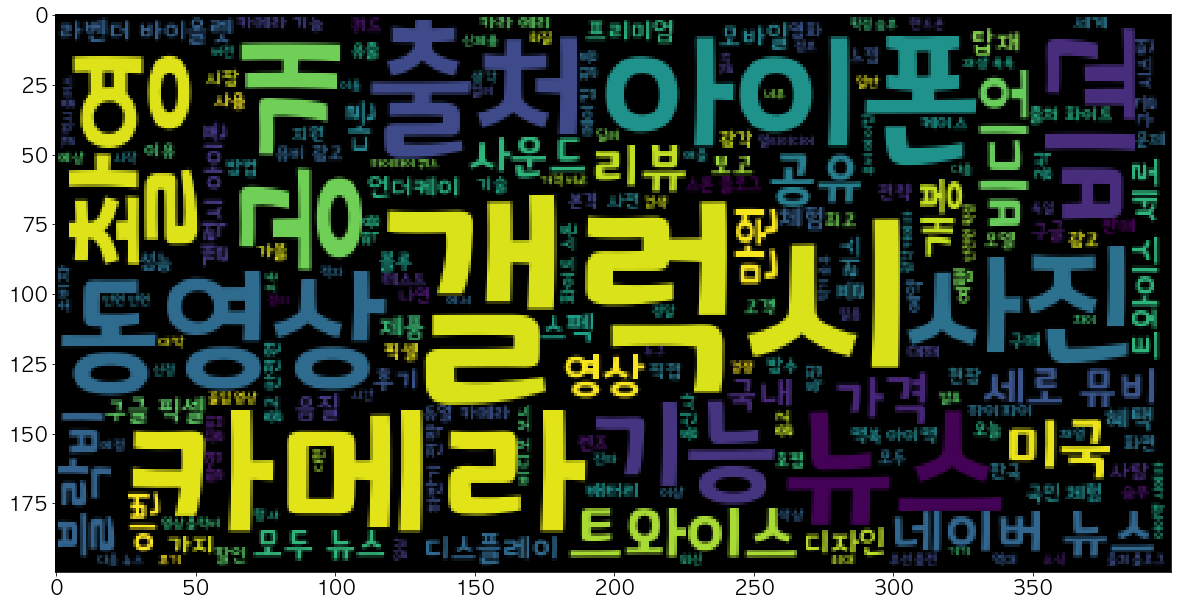

In [111]:
draw_wordcloud(v30_filter)

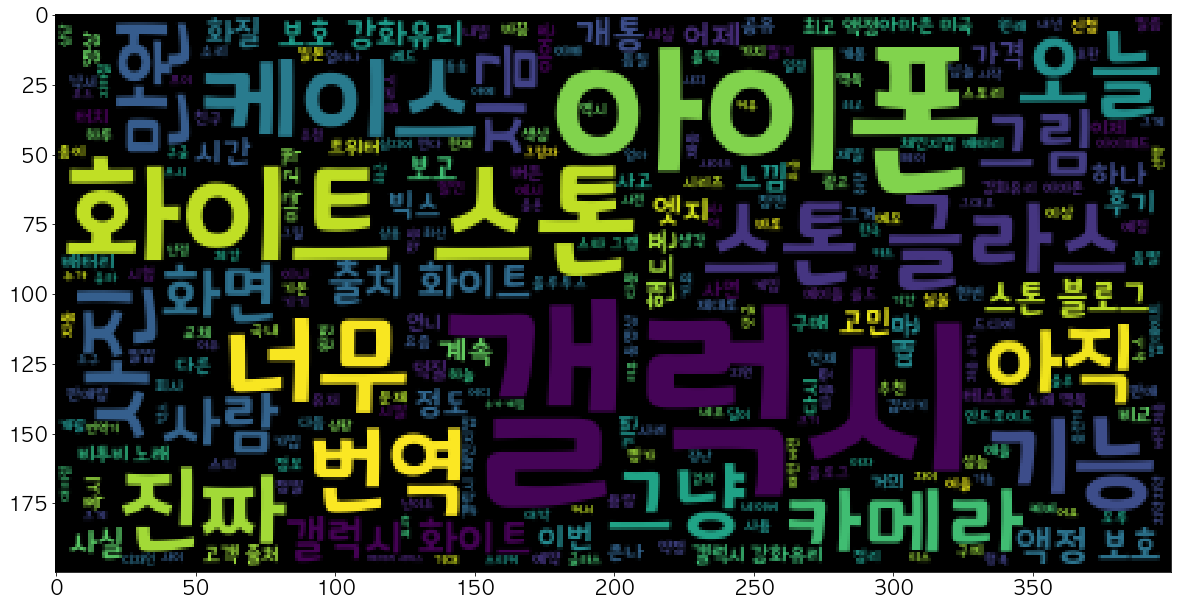

In [112]:
draw_wordcloud(note8_filter)

## 5) Appling Mast to Word Cloud
* Mask를 적용하여 Word Cloud를 좀 더 감각적으로 나타내 본다

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_file = 'font/Typo_SsangmunDongB.ttf'
WC = WordCloud(font_path = font_file,\
              max_words = 2000, width = 500, height = 500)


In [114]:
from PIL import Image
from wordcloud import STOPWORDS
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [115]:
# mask 
v30_mask = np.array(Image.open('img_file/v30logo.png'))
note8_mask = np.array(Image.open('img_file/note8logo.png'))

In [116]:
def draw_wordcloud_mask(contents, mask, model_name):
    WC = WordCloud(font_path = font_file,\
              max_words = 2000,\
              mask = mask)
    cloud_phone = WC.generate(' '.join(contents))
    
    plt.imshow( WC.recolor(color_func = grey_color_func, random_state=3), interpolation = 'bilinear')
    # 회색조 지정
    #WC.to_file("{}_logo.png".format(model_name))

    plt.axis("off")
    plt.figure(figsize = (30, 20))
    plt.imshow(cloud_phone, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    

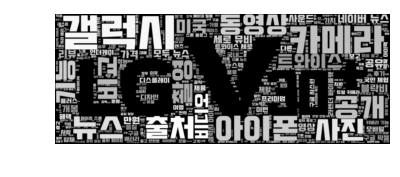

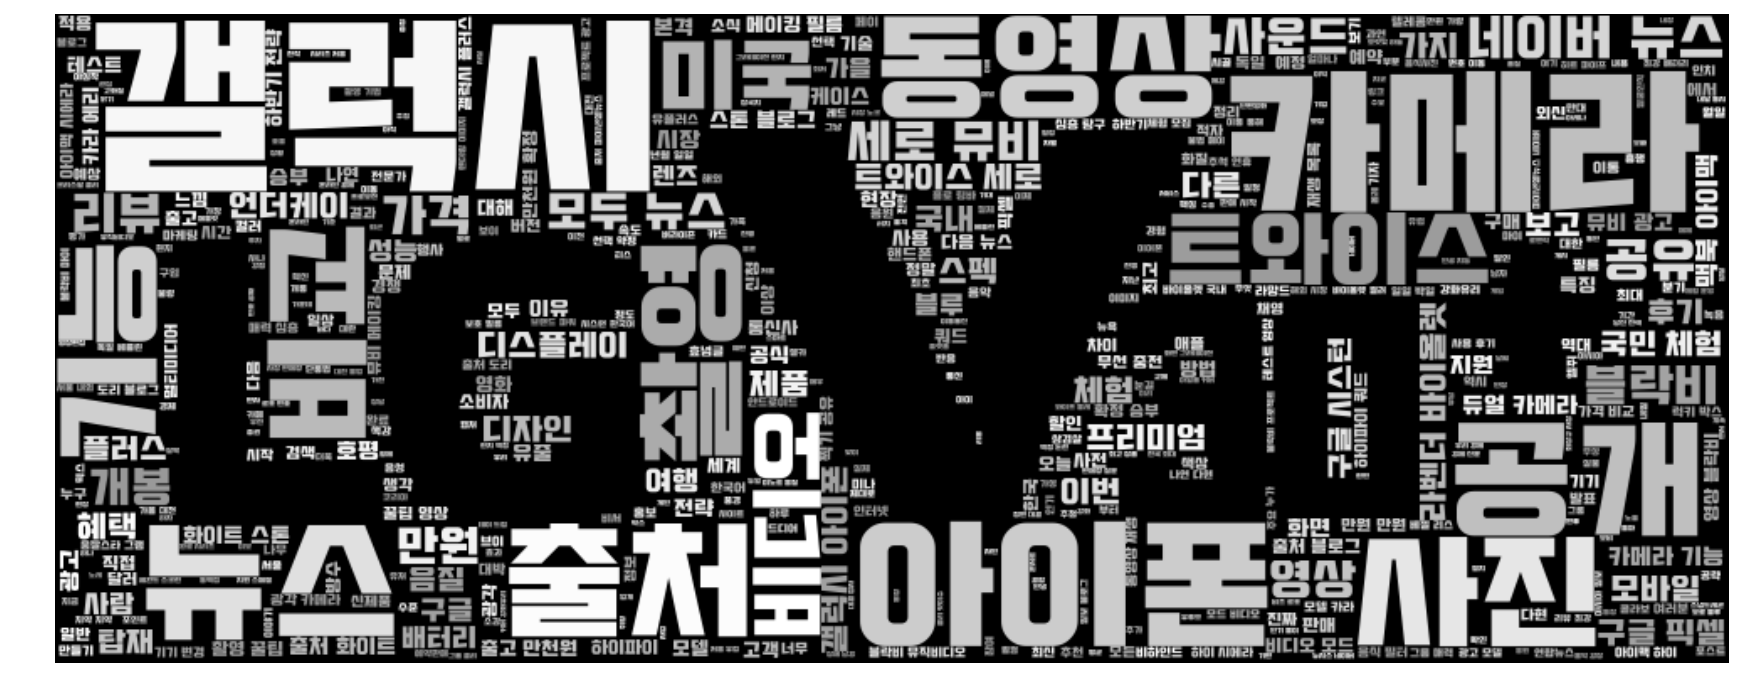

In [117]:
draw_wordcloud_mask(v30_filter, v30_mask, 'v30')

* 해당 핸드폰이 출시되기 전과 직후의 SNS임을 감안하였을 때 홍보글과 기대기능이 주를 이루었다
* 갤럭시가 많이 언급된 것으로 보아,v30에 관심을 가지고 있는 유저들은 비슷한 시기에 나오는 갤럭시 노트8과 비교를 하려는 흐름이 있는 것 같다
* V30이 주로 홍보하는 카메라기능과 연관된 카메라, 동영상, 촬영 등의 기대단어를 볼 수 있다

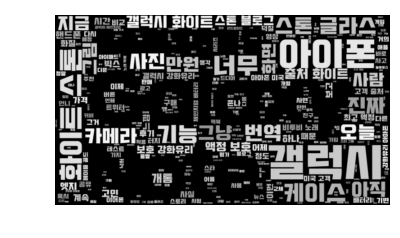

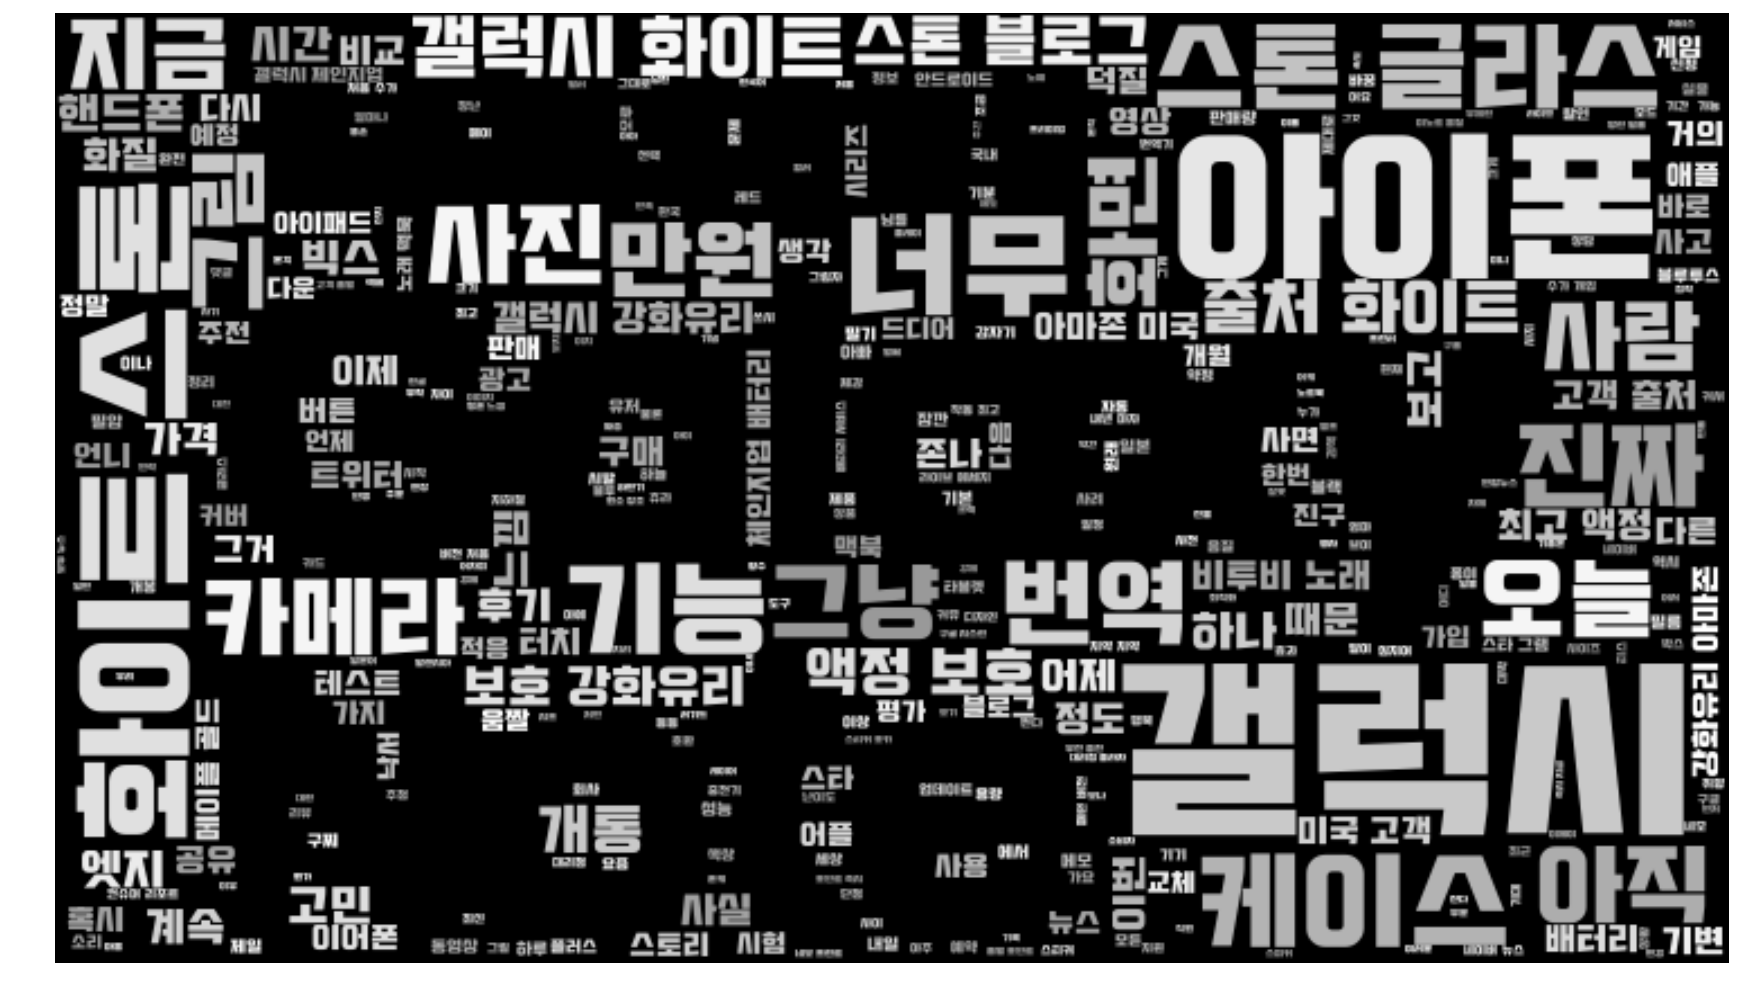

In [118]:
draw_wordcloud_mask(note8_filter, note8_mask, 'note8')

* v30에서는 갤럭시가 많이 언급 되었으나 갤럭시는 아이폰과의 비교를 하려는 추세. 엘지는 언급이 거의 되지 않는다는 것을 볼 수 있다
* 노트8은 한마디로 정해진 컨셉이 없어서 기능에 대한 언급은 없고, 화이트, 스톤 글라스처럼 디자인이나 외향에 대한 언급이 많다. 

In [119]:
# input 시간 제한 trouble shooting
# jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000

# 2. Tokenizing

### Cohesion Tokenizer이용
    * Konlpy와 다르게 토크나이징 분석 대상 코퍼스의 출현 빈도를 학습한 결과를 토대로 토큰을 나눠주기 때문에 분석 품질이 비교적 좋다
    * Word2Vec에 품사정보까지 넣을 필요가 없기 때문에 SoyNLP를 사용하겠다


## 1) Import data from Mongodb

* MySQL에 저장하기 전 진행한 정규표현식에서 영문이나 숫자등의 정보가 함께 삭제되었다.
* 유실된 정보가 있을 것으로 예측되어 다시한 번 세밀하게 정규 표현식을 진행한다

In [122]:
# 'text'의 중복을 배제하고 불러오는 함수
def mongo_distinct(mongo_object):
    
    result = mongo_object.distinct('text')
    contents_list = [i for i in result]
    print ("text 개수 : {}".format(len(contents_list)))
    return contents_list

In [123]:
v30_list = mongo_distinct(v30_dup)
v30_list[:10]

text 개수 : 784


['야마가타 대학의 강점은 올레드, 나스카 지상화, 암 치료입니다. 이들은 유망입니다. #삼성 #LG전자 #아이폰 #iPhone8 #iphonex #LGV30 #<b>V30</b> #GalaxyNote8 #갤럭시노트8  https://t.co/MJTS0ImRG0',
 '[IT다있다] 본격 색상마케팅!  - #<b>V30</b> #라벤더바이올렛, 출시  - #갤노트8  #메이플골드 출시 https://t.co/xGkZJAiZ8i https://t.co/lmr37tOVJg',
 'LG <b>V30</b> 블락비 MY Zone 뮤직비디오 촬영 꿀팁은?  https://t.co/Na1qlmzhGH #<b>V30</b> #블락비 #블락비뮤직비디오 #MYZONE #지코 #디오 #LGV30 #V30동영상 #V30꿀팁',
 '<b>V30</b> 라벤더 바이올렛의 UX, 솔직하게 평가해보니 과연?  #된다맥북아이맥 #하이시에라 #<b>V30</b> #LGV30 #플로팅바 #올웨이즈온디스플레이 #V30장단점 #UX #V30듀얼카메라 #V30라벤더바이올렛 https://t.co/I5nBtJ29xq',
 '[뉴스] 최상규 LG전자 사장, <b>V30</b> 판매량 묻는 질문에 &#34;잘 안팔려…&#34; 올 3분기 추정 적자는 2000억원대... ▶https://t.co/dhBZK8WAgx  #LG #<b>V30</b> #LGV30 #언더케이지 #underKG https://t.co/34DlV9FFbX',
 'LG <b>V30</b> 시네비디오 모드 사용하기! https://t.co/z1VmfdnqtW #<b>V30</b> #V30시네비디오 #V30동영상',
 'LG전자, <b>V30</b>로 찍은 ‘블락비’ 뮤직비디오 공개  #LG #LG전자 #<b>V30</b> #블락비 #BlockB  https://t.co/JLAMAveboF https://t.co/i60YiFvgS9',
 '페북지기 너 혼자 놀기 있기 없기?  트윗지기 빼고 혼자 다녀온 #<b>V30</b> 카메라 리뷰 

In [124]:
note8_list = mongo_distinct(note8_dup)
note8_list[:10]

text 개수 : 938


['후... <b>노트</b><b>8</b> 계약하고 왔다..... 기기가 매장에 없어서 오후에 퀵으로 쏴주는걸로.....',
 '허루ㅜㅜㅜㅜ<b>노트</b><b>8</b>케이스드디어이뿡고샄댜ㅠㅜㅠㅠㅠㅠㅠㅠ',
 '오늘 사랑하는 사람에게는 어떤 러브액션이 필요할까요? 치약을 펌핑하여 다트를 맞춰주세요! https://t.co/aL1zhB732J ##덴티스테 #덴티스테치약 #치약 #치약추천#이벤트 #이희준 # 갤럭시<b>노트</b><b>8</b> #갤노트8',
 '갤럭시 <b>노트</b><b>8</b> 일반판매 시작 https://t.co/9oL3LsxUvI #갤럭시노트8',
 '원래 <b>노트</b><b>8</b> 고민 하고있었는데 찬율님꺼 실물 보고 뽕차오름.....크킄 만족스럽군',
 '<b>노트</b><b>8</b>. 사전예약 고객 AAA시상식 티켓 응모관련. 추첨이 16일이었으나 넘나 잠잠하여 삼송 메일발송함. 사흘동안 답신없어서 전화하니 추첨지연이라함. 공지라도 하던지... 오늘 내일 추첨 후 개별문자로만 발송한다함 추첨여부는...영영 알수없는거임? https://t.co/r1qO8MBX6M',
 '@Tae_Garam <b>노트</b><b>8</b> 보다는 아이폰X가 좋지 않을까?',
 '나 전에 폰 알람이 오졋는데... 짜증나고 계속 반복돼고... <b>노트</b> <b>8</b> 알람 너무 조신한걸 좀더 짜증나는 소리 없나 다들 샹그릴라 해',
 '@MarioCho15 아이폰 X를 기다리고 있어요.. 근데 못 기다리고 <b>노트</b><b>8</b>을 좀 기웃거릴까 생각도 들어요.',
 '꿈속에서 폰 <b>노트</b><b>8</b>로 바꾸고 커뮤뛰려고 신청서팟어(대체)']

## 2) 정규표현식
    1. 링크: http://~
    2. 워드 클라우드시는 영문을 다 삭제하였으나 좀 더 세밀하게 거른다
    3. 문장에 방해되는 태그 및 키워드 삭제 : #한글, #영문
    4. 기타 기호
    

In [125]:
import re

In [126]:
p_link= re.compile('http[s]*[:\/\\.\w]*')
p_html = re.compile('(<b>\w*<\/b>)')
p_at = re.compile('@\w*')
p_tag1 = re.compile('#[_\w\s]*')
p_tag2 = re.compile('(&;[\s\w\W]*&;)+(&[\w]*;)+')
p_tag3 = re.compile('[&lt;]*[&gt;]*')
p_from1 = re.compile('\[[\w]*\]*')
p_from2 = re.compile('\(출처[\s\w\W]*\)+')
p_specialcha = re.compile('[♡▶★☆●■⭐️♥➡✨✌→▲❤▼↓♥❤️✅�◀‼️❣❣❣️✅]*')

re_compile_list = [p_link,p_html,p_at,p_tag1,p_tag2,\
                  p_tag3,p_from1,p_from2,p_specialcha ]

<input>:1: DeprecationWarning: invalid escape sequence \/
<input>:1: DeprecationWarning: invalid escape sequence \/
<input>:1: DeprecationWarning: invalid escape sequence \/
<input>:1: DeprecationWarning: invalid escape sequence \/
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \/
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \/
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \/
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \/
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \/
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:3: Dep

In [127]:
def make_re(text_list):
    temp_list = []
    for text in text_list:
        temp_text = text
        for re_compile in re_compile_list:
        
            temp_text = re_compile.sub('',temp_text )
        
        temp_text = re.sub(r'\s+\W+', ' ', temp_text) # 띄어쓰기 정비 
        temp_list.append(temp_text)
    return temp_list
    
    

In [128]:
v30_list_re = make_re(v30_list)
v30_list_re[:5]


['야마가타 대학의 강점은 올레드, 나스카 지상화, 암 치료입니다. 이들은 유망입니다. ',
 ' 본격 색상마케팅! 출시 ',
 'LG 블락비 MY Zone 뮤직비디오 촬영 꿀팁은? ',
 ' 라벤더 바이올렛의 UX, 솔직하게 평가해보니 과연? ',
 ' 최상규 LG전자 사장, 판매량 묻는 질문에 잘 안팔려… 올 3분기 추정 적자는 2000억원대... ']

In [129]:
note8_list_re = make_re(note8_list)
note8_list_re[:5]

['후... 계약하고 왔다..... 기기가 매장에 없어서 오후에 퀵으로 쏴주는걸로.....',
 '허루ㅜㅜㅜㅜ케이스드디어이뿡고샄댜ㅠㅜㅠㅠㅠㅠㅠㅠ',
 '오늘 사랑하는 사람에게는 어떤 러브액션이 필요할까요? 치약을 펌핑하여 다트를 맞춰주세요! ',
 '갤럭시 일반판매 시작 ',
 '원래 고민 하고있었는데 찬율님꺼 실물 보고 뽕차오름.....크킄 만족스럽군']

## 3) SoyNLP
* 출처 : https://github.com/lovit/soynlp

* sns는 특성상 (댓글이나 후기도 마찬가지 이겠지만) 신조어, 구어체가 많고 특정 제품등 대명사가 많이 등장한다. KoNLP는 지도학습으로 만들어진 사전형식이기 때문에 해당 부분의 자연어  토크나이징에 최적화 되어 있다고는 할 수 없다. 
* Soynlp는 비지도 학습의 자연어 처리 라이브러리로, 문맥을 파악하여 명사추출, 단어 추출 및 토크나이징을 하기 때문에 적용 해 볼 수 있을 것 같다

In [130]:
from pprint import pprint 
import sys
sys.path.append('../../../soy/')


In [131]:
from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer

## 토크나이징 순서

    1. sns text 를 txt 파일로 저장
    2. wordextractor로 cohesion_forward점수를 계산하여 (한국어는L + [R]형태, L에 명사, 동사, 형용사, 부사 등 신조어나 의미가 변하는 단어들이 많이 오기 때문에 forward점수만 확인한다) score dictionary를 만든다
    3. wordextractor로 잡아낼 수 없는 단어의 점수를 수기로 score dictionary에 추가한다.
    4. score dictionary를 적용하여 tokenizing을 할 수 있다 
       MaxScoreTokenizer & RegexTokenizer 사용 


### 3-1) TXT 파일로 변환

In [132]:
def export_txt(sns_text, model_name):
    file_path = 'text_file/'+model_name+'_text'
    with open(file_path, 'w', encoding = 'utf-8') as f:
        for text in sns_text:
            f.write('{}\n'.format(text))

In [133]:
export_txt(note8_list_re, 'note8')
export_txt(v30_list_re, 'v30')

### 3-2) WordExtractor
    * WordExtractor: 비지도 학습
    * KoNLP는 지도학습이기에 알려지지 않은 단어가 오면 처리를 할 수 없기 때문에, 도메인의 특별한 어구들을 알 수 없다. 

##### WordExtrator는 위 세가지 단어 가능 점수를 계산하여 준다
1. Branching Entropy
    * 컨셉: 'n'다음에 올 글자는? 많은 사람이 대답할 수 없다. 만약 'natur'다음에 올 글자는? '-e' 혹은' -al'라고 대답할 수 있다. 즉, 문맥이 명확히 주어질 수록 다음 글자의 불확실성은 내려간다. 이런 불확실성을 수치로 나타내는 개념으로 entropy가 있다. 불확실성이 낮아질수록 entropy의 값은 작아진다. 그런데 'natural'다음에 오는 글자는 다시 여러 종류가 있다. 단어의 경계이기 때문에 다른 단어들이 등장할 수 있기 때문이다. 
    * 이처럼, _단어의 경계에서 entropy가 높을 것이라 가정하는 방법_이 **Branching Entropy**이다. 
2. Accessor Variety
    * 간단히 말하면 Accessor Variety는 Branching Entrooy의 discrete(분리된)버전이다. 
    * nature, natural 두 단어가 존재한다고 하면 natur+[-e,-a]이기 때문에 right side의 **accessor variety는 len({e, a})=2**이다. (Branching entropy는 -e와 -a가 몇 번 나왔늕의 빈도수를 센 다음 이를 이용하여 entropy를 계산하는 것이 차이점이다)
3. Cohesion Score
    * Branching Entropy와 Accessor Variety는 단어 좌/우의 경계에 등장하는 글자의 정보를 이용하여 단어의 경계를 판단하는 exterior boundary scoring의 방법이다. 이것과 다르게 단어를 구성하는 글자들이 얼마나 함께 자주 등장하는지 정보로도 단어의 경계를 판단할 수 있다. 이것을 _interior boundary scoring_이라고 한다
    * 한국어의 어절은 L+[R]구조인데 의미를 지니는 단어(명사, 동사, 형용사, 부사)가 어절의 왼쪽(L part), 문법기능을 하는 (조사, 어미)가 어절의 오른쪽에 등장한다. 
    * 새로운 단어들이 생겨나는 L part를 open class라고 하고, R part는 쉽게 바뀌지 않기 때문에 closed class라고 한다. **우리가 데이터에서 추출해야 하는 새로운 개념의 단어들은 L part**이다.


<br> def __init__(
            
            left_max_length=10, 
            right_max_length=6, 
            min_count=5, 
            verbose_points=100000, 
            min_cohesion_forward=0.1, 
            min_cohesion_backward=0.0, 
            max_droprate_cohesion=0.95, 
            max_droprate_leftside_frequency=0.95, 
            min_left_branching_entropy=0.0,
            min_right_branching_entropy=0.0, 
            min_left_accessor_variety=0, 
            min_right_accessor_variety=0, 
            remove_subwords=True)

In [134]:
from soynlp.word import WordExtractor

In [135]:
class Sentences:
    def __init__(self, fname):
        self.fname = fname
        self.length = 0
    def __iter__(self):
        with open(self.fname, encoding = 'utf-8') as f:
            for doc in f:
                doc = doc.strip()
                if not doc:
                    continue
                for sent in doc.split(' '):
                    yield sent
                    
    def __len__(self):
        if self.length ==0:
            with open(self.fname, encoding = 'utf-8') as f:
                for doc in f:
                    doc = doc.strip()
                    if not doc:
                        continue
                    self.length += len(doc.split(' '))
        return self.length
    

In [136]:
def make_sentences(model_name):
    corpus_fname = 'text_file/'+model_name+'_text'
    sentences = Sentences(corpus_fname)
    print('{} 문장 개수 : {}'.format(model_name, len(sentences)))
    return sentences

In [137]:
def make_wordextractor(model_name, min_count, min_cohesion_forward):
    word_extractor = WordExtractor(min_count = min_count, 
                                  min_cohesion_forward = min_cohesion_forward,
                                  min_right_branching_entropy=0.0)
    sentences = make_sentences(model_name)
    word_extractor.train(sentences)
    words = word_extractor.extract()
    return words

In [138]:
v30_words = make_wordextractor('v30',5, 0.05 )

v30 문장 개수 : 8483
training was done. used memory 0.587 Gb
all cohesion probabilities was computed. # words = 880
all branching entropies was computed # words = 603
all accessor variety was computed # words = 603


In [139]:
print (v30_words['트와이스'])
print('\n{} 단어 개수 : {} '.format('v30', len(v30_words)))

Scores(cohesion_forward=0.91626032707417904, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=0.6869615765973234, left_accessor_variety=0, right_accessor_variety=2, leftside_frequency=30, rightside_frequency=0)

v30 단어 개수 : 1014 


In [140]:
note8_words = make_wordextractor('note8', 5, 0.05)

note8 문장 개수 : 8214
training was done. used memory 0.588 Gb
all cohesion probabilities was computed. # words = 624
all branching entropies was computed # words = 365
all accessor variety was computed # words = 365


In [141]:
print (note8_words['빅스비'])
print('\n{} 단어 개수 : {} '.format('note8', len(note8_words)))

Scores(cohesion_forward=1.0, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=0, left_accessor_variety=0, right_accessor_variety=0, leftside_frequency=11, rightside_frequency=0)

note8 단어 개수 : 901 



#### '트와이스', '빅스비'같은 최신 단어도 하나의 단어로 잘 구분하는 것을 알 수 있다

### 3-3) Making Score Dictionary

    * WordExtractor가 계산하는 것은 다양한 종류의 단어 가능 점수들인데, 이를 잘 조합하여 원하는 점수를 만들 수도 있다 
    * cohesion_forwards에 right_branching_entropy를 곱하는 방법이 있는데 (1) 주어진 글자가 유기적으로 연결되어 함께 자주 나타나고, '(2) 그 단어의 우측에 다양한 조사, 어미, 혹은 다른 단어가 등장하여 단어의 우측의 branching entropy가 높다는 의미이다



In [142]:
def word_score(score):
    import math 
    return (score.cohesion_forward * math.exp(score.right_branching_entropy))



In [143]:
def make_score_dict(words):
    
    score_dict = {}
    
    for word, score in sorted(words.items(), key=lambda x:word_score(x[1])):
        
        score_dict[word] = score.cohesion_forward # word_score에서 계산된 점수를 value로
    
    
    
    return score_dict
#수기로 딕셔너리를 추가한다. update를 하니 type은 nonetype이 된다
    

In [144]:
v30_score_dict = make_score_dict(v30_words)

add_dict = {'매장': 0.8, '오후':0.7, '메모리':0.8, '케이스':1.0,\
               '출시': 0.5, '카메라':1.0,'질문': 1.0, '적자':1.0,\
           '사운드':1.0, '캡처':1.0, '인터넷':1.0, '움짤':1.0,\
           '구글':1.0, '매출':1.0, '필터':1.0, '비디오':1.0,\
           '호평':1.0, '매력':1.0, '디자인':1.0, '출시':1.0, '브랜드파워':1.0,\
           '폰':0.8, '장점':1.0}
v30_score_dict.update(add_dict)


In [145]:
note8_score_dict = make_score_dict(note8_words)
note8_score_dict.update(add_dict)


### 3-4) Tokenizing
* SoyNLP의 경우 크게 세 가지를 제시하고 있다

#### (1)  MaxScoreTokenizer : 
    - 띄어쓰기가 잘 안되어 있는 문장의 경우, 단어라고 확신이 드는 부분부터 연속된 글자집합에서 잘라내어도 토크나이징이 된다. 
     - 장점은 각 도메인에 적절한 단어 점수를 손쉽게 변형할 수 있다는 점이다.
    - 도메인에서 반드시 단어로 취급되어야 하는 글자들이 있다면 그들의 점수를 scores에 최대값으로 입력하면 된다. 
    - flatten을 하지 않으면 list of list 형식으로 토크나이징 결과가 출력된다. (subword, begin, end, score, length), default는 True

#### (2) LTokenizer:
    - 띄어쓰기가 잘 되어 있다면 한국어 문서의 경우에는 MaxScore Tokenizer를 이용할 필요가 없다. 
    - 한국어는 L+[R]구조이기 때문이다
    - 한 어절의 왼쪽에서부터 글자 점수가 가장 높은 부분을 기준으로 토크나이징을 한다.

#### (3) RegexTokenizer
    - 단어를 추출하지 않아도 기본적으로 tokenizing되어야 하는 부분들이 있다
    - 그것은 바로 언어의 종류가 바뀌는 부분들이다. 왜냐면 다른 언어의 종류가 혼합된 고유 명사의 경우 window로 파악 할 수 있기 때문이다.
    - 원리는 정규표현식을 이용하여 언어가 달라지는 순간들을 띄어쓴다

**-> text가 띄어쓰기가 잘 되어 있지 않고, 숫자와 영어의 혼합이 많기 때문에 우선 MaxScoreTokenizer를 적용 후, 각 토큰에 RegexTokenizer를 적용하기로 한다**

In [146]:
def make_Maxtoken(contents, score_dict):
    max_tokenizer = MaxScoreTokenizer(scores = score_dict)
    token_list = [max_tokenizer.tokenize(i) for i in contents]
    return token_list

In [147]:
def Maxtoken_Regextoken(contents, score_dict):
    
    
    max_tokenizer = MaxScoreTokenizer(scores = score_dict)
    token_list = [max_tokenizer.tokenize(i) for i in contents]
    
    tokenizer = RegexTokenizer()
    regex_list = []
    for token in token_list:
        temp = []
        for i in token:
            temp.append(tokenizer.tokenize(i))
        
        regex_list.append(token)
            
    return regex_list
    
        
    #return regex_list

In [148]:
v30_token_list= Maxtoken_Regextoken(v30_list_re, v30_score_dict)
v30_token_list[:3]

[['야마가타', '대학의', '강점은', '올레드,', '나스카', '지상화,', '암', '치료입니다.', '이들은', '유망입니다.'],
 ['본격', '색상', '마케팅!', '출시'],
 ['LG', '블락비', 'MY', 'Zone', '뮤직', '비디오', '촬영', '꿀팁', '은?']]

In [149]:
note8_token_list= Maxtoken_Regextoken(note8_list_re, note8_score_dict)
note8_token_list[:3]


[['후',
  '..',
  '.',
  '계약',
  '하고',
  '왔다',
  '..',
  '..',
  '.',
  '기기가',
  '매장',
  '에',
  '없어서',
  '오후',
  '에',
  '퀵',
  '으로',
  '쏴주는걸로',
  '..',
  '..',
  '.'],
 ['허루', 'ㅜㅜ', 'ㅜㅜ', '케이스', '드디어', '이뿡고샄댜ㅠㅜ', 'ㅠㅠ', 'ㅠㅠ', 'ㅠㅠ'],
 ['오늘',
  '사랑',
  '하는',
  '사람',
  '에게는',
  '어떤',
  '러브액션이',
  '필요',
  '할까요?',
  '치약을',
  '펌핑하여',
  '다트를',
  '맞춰주세요!']]

##### _여기서 나온 토큰은 Word2Vec에 사용할 것이다_

### 3-5) Making New Wordcloud

* 비지도 학습으로 명사를 추출하는 SoyNLP의 특성을 이용하여 새로이 Word Cloud를 그릴 수 있다.

In [150]:
from soynlp.noun import LRNounExtractor
from soynlp.word import WordExtractor

In [151]:
verbose = True
left_max_length = 10
right_max_length = 6
min_count = 5

word_extractor = WordExtractor()
noun_extractor = LRNounExtractor(None, \
                                verbose,
                                left_max_length,
                                right_max_length,
                                min_count,
                                word_extractor)






used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
2398 r features was loaded


In [152]:
def top100(nouns, model_name):
    top100 = sorted(nouns.items(), key = lambda x:frequency(nouns, x[0]),\
                   reverse = True)[:100]
    print ('\n{} 단어들\n'.format(model_name))
    print(k_words_a_line(top100))

In [153]:
def make_nouns(model_name):
   
    sentences = make_sentences(model_name)
    nouns = noun_extractor.train_extract(sentences, \
                                    minimum_noun_score = 0.3, 
                                    min_count = 100)
    print ('\n단어 수  = {}'. format(len(nouns)))
    top100(nouns, model_name)
    return nouns

#명사 점수 0.3점 이상
# 문서집합에서 등장한 빈도가 100번 이상인 단어들에서 명사를 추출

In [154]:
def k_words_a_line(top, k=5):
    def as_str(subtop):
        return '    '.join (["{} ({})".format(t[0], t[1][0])\
                            for t in subtop])
    num_line = len(top) // k if len(top) % k == 0 else (len(top) // k)+1
    sents = []
    
    for i in range(num_line):
        sents.append(as_str(top[i*k:(i+1)*k]))
    return '\n'.join(sents)

def frequency(nouns, word):
    return nouns[word].frequency if word in nouns else 0

In [155]:
note8_nouns = make_nouns('note8')


note8 문장 개수 : 8214
scanning completed
(L,R) has (754, 434) tokens
building lr-graph completed
단어 수  = 125

note8 단어들

갤럭시 (150)    아이폰 (88)    삼성 (35)    강화유리 (34)    돔글라스 (32)
V30 (32)    액정 (29)    사은품 (27)    번역 (26)    기능 (26)
진짜 (25)    아직 (24)    사진 (23)    그림 (23)    배터리 (22)
케이스 (21)    사고 (20)    고객 (20)    LG (20)    화면 (19)
최고 (19)    개통 (18)    카메라 (18)    지금 (18)    사용 (18)
생각 (15)    가입 (15)    하나 (14)    고민 (14)    스마트 (14)
어제 (14)    사람 (13)    엣지 (13)    출시 (13)    사전예 (13)
느낌 (13)    스마트폰 (12)    가격 (12)    한달 (12)    S8 (12)
살까 (12)    이번 (11)    처음 (11)    영상 (11)    후기 (11)
아이폰7 (11)    빅스비 (11)    화질 (11)    S펜 (10)    안드 (10)
혹시 (10)    덕질 (10)    터치 (10)    트위터 (10)    그거 (9)
신기 (9)    체인지업 (9)    사이 (9)    시간 (9)    정도 (9)
이어폰 (8)    s8 (8)    보다 (8)    언제 (8)    샀다 (8)
아이폰X (8)    언니 (8)    256기 (8)    갖고 (8)    광고 (8)
적응 (8)    음질 (8)    안드로이드 (7)    신청 (7)    불편 (7)
친구 (7)    서비스 (7)    때문 (7)    완벽 (7)    필요 (7)
대리점 (7)    스티커 (7)    기본 (6)    기종 (6)    앙스타

In [156]:
v30_nouns = make_nouns('v30')

v30 문장 개수 : 8483
scanning completed
(L,R) has (889, 563) tokens
building lr-graph completed
단어 수  = 178

v30 단어들

LG (579)    스마트폰 (83)    카메라 (76)    LG전자 (75)    갤럭시 (74)
출시 (72)    갤럭시노트 (55)    갤럭시노트8 (52)    아이폰 (47)    영상 (44)
기능 (41)    갤노트8 (40)    촬영 (39)    구글 (38)    동영상 (37)
공개 (36)    삼성 (35)    블락비 (34)    비교 (32)    공유 (32)
모두 (32)    광고 (30)    국내 (28)    노트 (27)    사진 (26)
미국 (25)    사용 (23)    사운드 (23)    가격 (22)    뮤비 (22)
노트8 (22)    바이올렛 (21)    이번 (20)    시네비디오 (20)    리뷰 (20)
디자인 (19)    이벤트 (18)    94 (18)    전략 (18)    출고 (17)
엘지 (17)    배터리 (17)    프리미엄 (17)    다음 (17)    모델 (16)
영화 (16)    시작 (16)    디스플레 (16)    탑재 (16)    픽셀2 (15)
21일 (15)    M/V (15)    화면 (14)    개봉기 (14)    제품 (14)
스펙 (14)    정리 (14)    프로 (14)    적용 (13)    선택 (13)
판매 (13)    사전예 (13)    하이파 (13)    성능 (13)    G6 (12)
생각 (12)    사람 (12)    DAC (12)    보고 (12)    OLED (12)
여행 (11)    예약 (11)    대전 (11)    혜택 (11)    유출 (11)
강화 (11)    체험단 (11)    이유 (11)    독일 (11)    호평 (11)
컬러 (11)    

In [157]:
# 위에서 추출된 명사를 WordCloud에 넣을 수 있는 형태로 변환한다
def make_wordcloud_contents(nouns):
    cloud_list = {}
    inner_list = []
    count = len(list(nouns.keys()))
    
    for i in range(count):
        for j in range(nouns[list(nouns.keys())[i]].frequency):
            
            
            
            cloud_list[list(nouns.keys())[i]]=nouns[list(nouns.keys())[i]].frequency
        
    
            
    return cloud_list


In [158]:
soy_note8 = make_wordcloud_contents(note8_nouns)
soy_v30 = make_wordcloud_contents(v30_nouns)

In [159]:
# Mask
import numpy as np
total_mask = np.array(Image.open('img_file/twitter_mask.png'))


In [160]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

def Soy_wordcloud(contents, mask):
    
    image_colors = ImageColorGenerator(mask)
    WC = WordCloud(font_path = font_file,\
              max_words = 2000, \
              mask = mask, background_color = 'white')
    WC = WC.generate(' '.join(contents))
    plt.figure(figsize = (30,20))
    
    plt.imshow(WC.recolor(color_func = image_colors), interpolation='bilinear')
    plt.axis("off")
    plt.show()

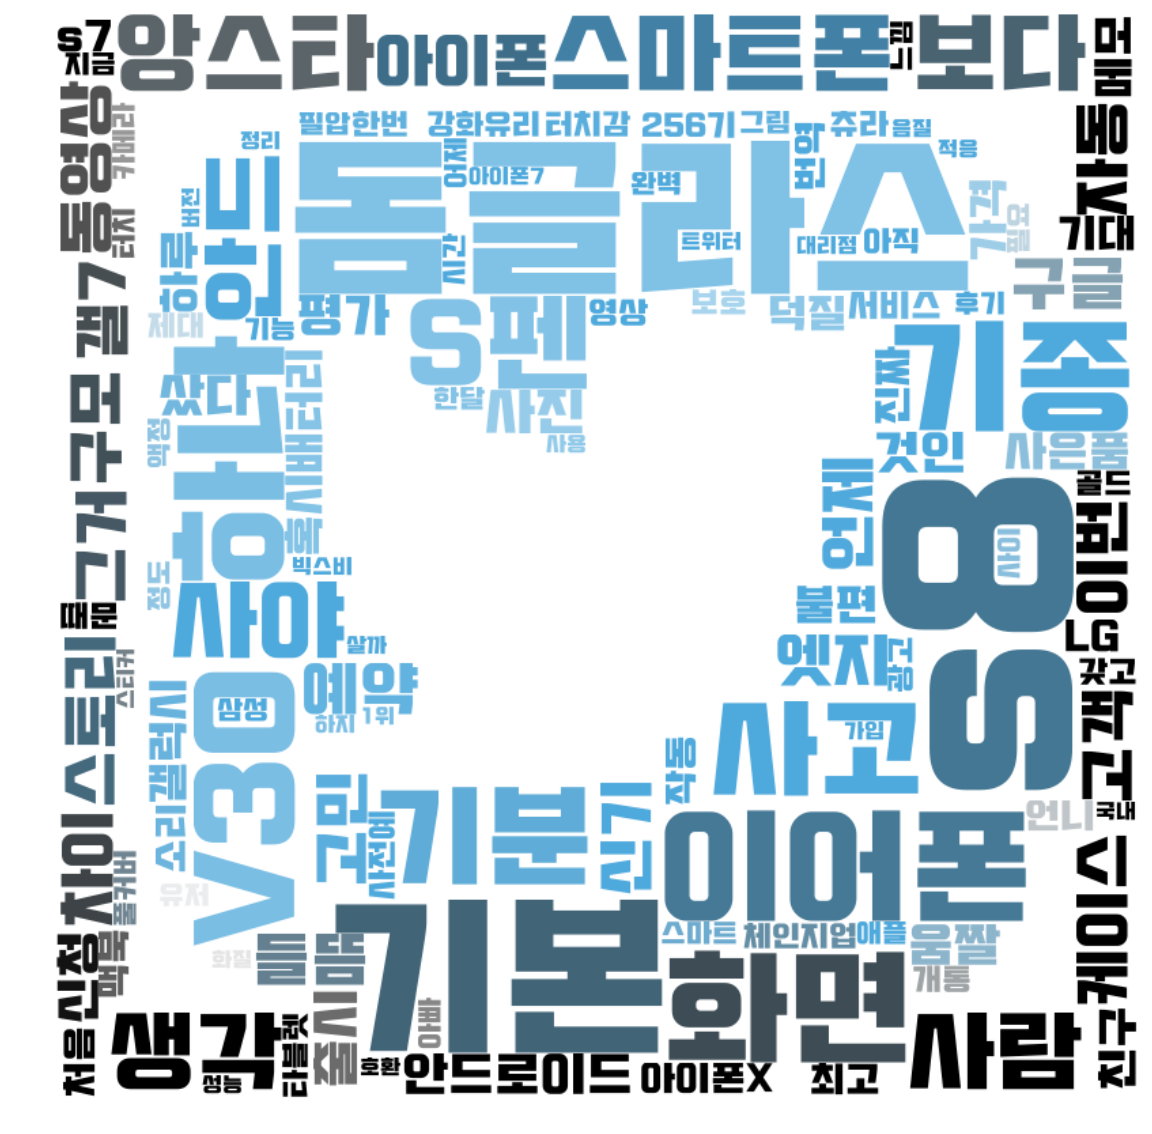

In [161]:
Soy_wordcloud(soy_note8,total_mask )

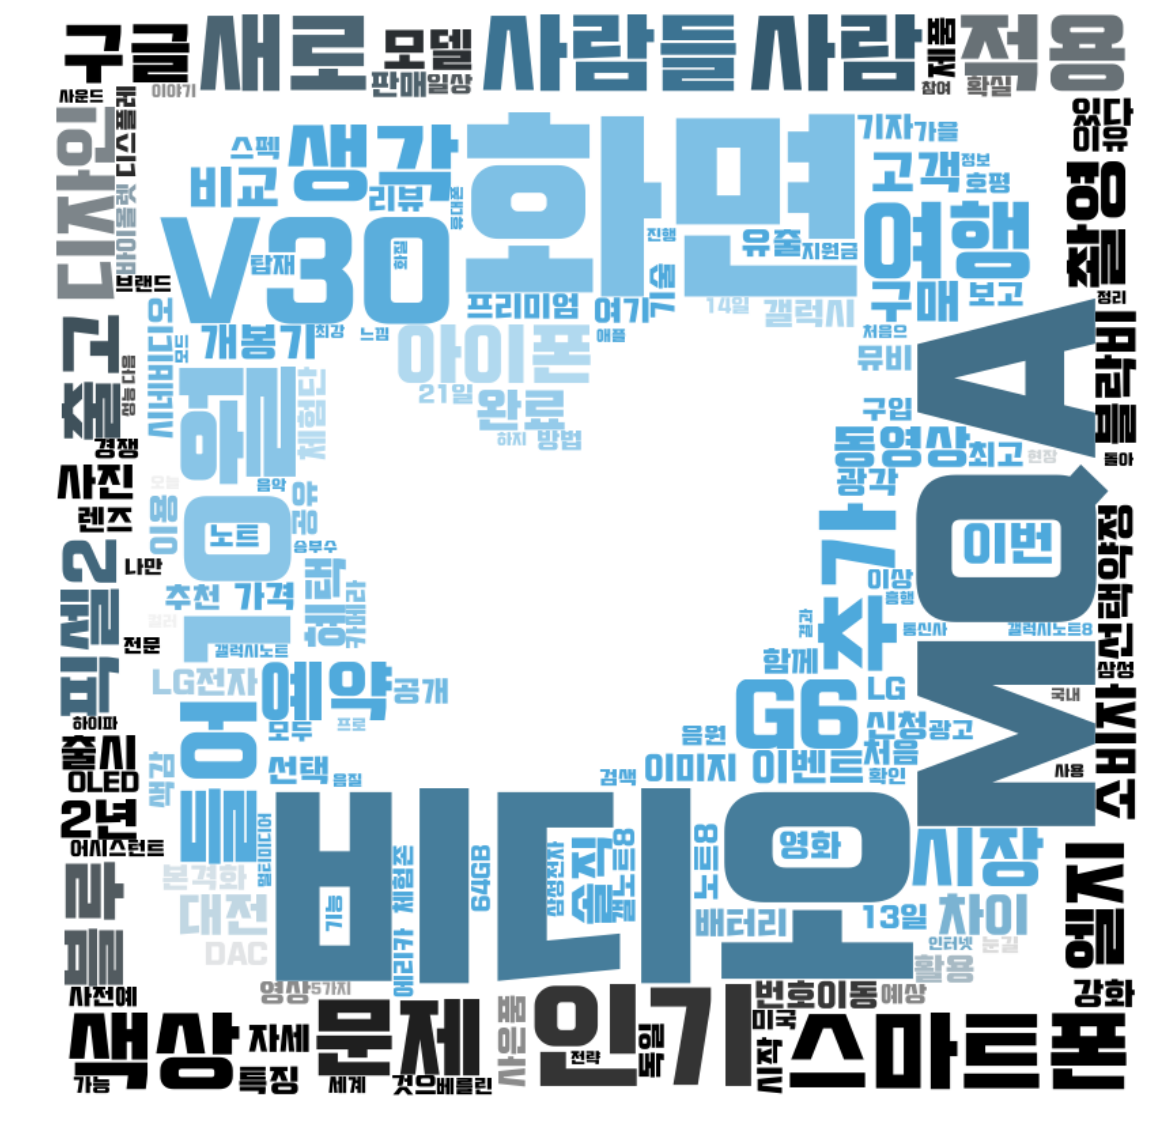

In [162]:
Soy_wordcloud(soy_v30,total_mask )

## 4. Word Embedding

* Embedding: Word2Vec, 단어를 벡터로 바꿔준다. 단어를 벡터화 할 때 단어의 문맥적 의미를 보존할 수 있다


### 4-1) stop word
    * topic word와는 관계없는 단어를 제외하자 (stop words라고 부른다)
    * Stop words는 유연하고 대체 가능해야 한다. 분석하고자 하는 분야에 따라서 고유의 stop word 리스트를 가지고 있는 것이 좋다. 
    * note8_token_list / v30_token_list

In [69]:
stop_words = open('text_file/stop_words_meaningless.txt', mode='r', \
                 encoding='utf-8').read().split('\n') # 토픽 파악에 도움이 되지 않는 단어 삭제



stop_func = open('text_file/stop_func.txt', mode='r', \
                 encoding='utf-8').read().split('\n') # 특수문자, 오타 등 SNS특성상 자주 잘못 입력되는 단어들

In [70]:
def remove_stopwords(token_list): # stopword 제거 함수
    stop_words = open('text_file/stop_words_meaningless.txt', mode='r', \
                 encoding='utf-8').read().split('\n')
    new_list = []
    
    for sentence in token_list:# 이중 리스트에서 한 문장씩
        check =[]
        for token in sentence:# 문장내에서 한 token씩 가져온다
            for func in stop_func:
                token = token.replace(func, '')# Token내의 오타, fuctuation등 제거
                
            
            if len(token)>1 and token not in stop_words:
                check.append(token)
                
                
        new_list.append(check)   
        
        
    return new_list


In [71]:
note8_no_stopwords = remove_stopwords(note8_token_list)
v30_no_stopwords = remove_stopwords(v30_token_list)

### 4-2) word embedding

In [72]:
import csv
import numpy as np

Premade_corpus_list = True

corpus_list_filepath = 'models/total_corpus_list.csv'

if not Premade_corpus_list:
    with open(corpus_list_filepath, 'w') as f:
        
        total_list = note8_no_stopwords + v30_no_stopwords
        writer = csv.writer(f, lineterminator='\n')
        writer.writerows(total_list)
        
else: 
    with open(corpus_list_filepath, 'r') as f:
        reader = csv.reader(f, lineterminator='\n')
        total_list = list(reader)


In [73]:
from gensim.models import Word2Vec

embedding_model = Word2Vec(total_list, size = 1000,\
                          window = 3, min_count = 5, workers = 4, \
                          iter = 500, sg = 1)

# 포스태깅된 컨텐츠를 1000차원의 벡터로 
# 주변단어 (window)는 앞 뒤로 두개까지
# 코퍼스 내 출현 빈도가 10번 미만인 단어는 분석에서 제외
# CPU는 쿼드코아
# 500번반복학습
# 분석 방법론은 CBOW와 Skip-gram 중 후자를 선택

In [74]:
print(embedding_model.most_similar(positive=['배터리'], topn = 10))

[('체인지업', 0.5001100301742554), ('가입하', 0.4708573818206787), ('있습', 0.4667280912399292), ('충전', 0.4617922902107239), ('가입', 0.4557262063026428), ('무선', 0.44498759508132935), ('최강', 0.4359216094017029), ('구모루', 0.4170365631580353), ('GEAR', 0.38748466968536377), ('에는', 0.3670123219490051)]


In [75]:

print(embedding_model.most_similar(positive=['삼성'], topn = 10))

[('애플', 0.38514775037765503), ('골드', 0.3575100898742676), ('확정', 0.3512418866157532), ('브랜드', 0.34313762187957764), ('던졌다', 0.3388787806034088), ('VS', 0.3286898136138916), ('메이플', 0.32616615295410156), ('94만9천300원', 0.32045280933380127), ('64GB', 0.31715837121009827), ('베를린', 0.3137393593788147)]


In [76]:
print(embedding_model.most_similar(positive=['LG'], topn = 10))

[('GEAR', 0.34075528383255005), ('MV', 0.33929169178009033), ('확정', 0.3359624445438385), ('멀티미디어', 0.3315524458885193), ('he', 0.31884610652923584), ('음성', 0.316827654838562), ('전자는', 0.31654995679855347), ('99만', 0.3129899501800537), ('검색', 0.3128167390823364), ('정리해', 0.30993279814720154)]


### 4-3) Tsne 
    * 추출된 단어들의 거리를 시각화 함으로써 관계가 근접한 단어들을 한번에 확인할 수 있다.

In [77]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource, value
output_notebook()

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/bokeh/core/json_encoder.py:52: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  NP_EPOCH = np.datetime64('1970-01-01T00:00:00Z')


Loading BokehJS ...

In [78]:
from sklearn.manifold import TSNE
import pandas as pd

In [79]:
X = embedding_model[embedding_model.wv.vocab] # 단어
embedding_frame = pd.DataFrame(X, index = embedding_model.wv.vocab.keys())

In [80]:
%%time
Premade_tsne = False
tsne_filepath = 'models/tsne.pkl'

if not Premade_tsne:
    tsne = TSNE(random_state=0)
    tsne_points = tsne.fit_transform(embedding_frame.values)
    with open(tsne_filepath, 'wb') as f:
        pickle.dump(tsne_points, f)
else:
    with open(tsne_filepath, 'rb') as f:
        tsne_points = pickle.load(f)
        
tsne_df = pd.DataFrame(tsne_points, index = embedding_frame.index,\
                       columns = ['x_coord', 'y_coord'])
tsne_df['word'] = tsne_df.index

# x, y좌표를 구하고 word에는 각 단어를 넣는다

CPU times: user 10.3 s, sys: 685 ms, total: 11 s
Wall time: 11.2 s


In [81]:

plot_data = ColumnDataSource(tsne_df)
colors = ["#%02x%02x%02x"]

TOOLS="hover,pan,wheel_zoom,zoom_in,\
zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,\
poly_select,lasso_select,"


p = figure(tools = TOOLS, title = '최신폰(V30 & Note8)단어 Embedding')
p.add_tools(HoverTool(tooltips = '@word'))

p.circle('x_coord', 'y_coord', source = plot_data,
        fill_alpha = 0.1, line_alpha = 0.3, 
        color='green', size = 10)


p.xaxis.visible = False
p.yaxis.visible = False
p.grid.grid_line_color = None
p.outline_line_color = None
show(p)

## 5. LDA

### 5-1) Document-term matrix 만들기(constructing)

    * LDA모델을 생성하기 위해서 각 용어가 문서 내에서 얼마나 자주 나오는지 이해할 필요가 있다. 이를 위해서 documnet-term matrix를 gensim으로 만들어야 한다
    * 다음은 dictionary를 bag-of-words로 바꿔야 한다
    * doc2bow() 의 결과는 corpus인데 벡터의 list이다. document의 개수와 같다.
    * 각 document vector는 tuple의 집합이다. 
    * corpus = (term ID, term-frequency)

In [82]:
from gensim import corpora, models
from gensim.models import LdaMulticore
from gensim.models import LdaModel
import gensim

In [83]:
def Make_dict_corpus(token_list):
    dictionary = corpora.Dictionary(token_list)
    corpus = [dictionary.doc2bow(text) for text in token_list]
    return dictionary, corpus

In [84]:
total_dict, total_corpus = Make_dict_corpus(total_list)

* dictionary()는 ()안의 이중리스트를 돌면서 각 token에 고유의 정수 id를 부여한다. 또한 단어의 개수를 센다. 토큰의 id를 보기 위해서는 print(dictionary.token2id)를 하면 딘다

In [85]:
print ("corpus 예시: {}".format(total_corpus[0]))

corpus 예시: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


### 5-2) Applying the LDA model

In [3]:
%%time
Premade_LDA = True
lda_filepath = 'models/lda_model'

if not Premade_LDA:
    
    ldamodel = LdaModel(total_corpus, num_topics = 4, 
                      id2word=total_dict,
                      passes=20)
    ldamodel.save(lda_filepath)
else:
    ldamodel = LdaModel.load(lda_filepath)

CPU times: user 5.72 ms, sys: 2.53 ms, total: 8.25 ms
Wall time: 8.58 ms


In [5]:
import pprint as pp
pp.pprint(ldamodel.print_topics(num_topics=4, num_words=5))

[(0, '0.060*"LG" + 0.010*"스마트폰" + 0.007*"뉴스" + 0.006*"비교" + 0.006*"영상"'),
 (1, '0.014*"아이폰" + 0.007*"바꾸" + 0.004*"좋은" + 0.004*"LG" + 0.003*"이랑"'),
 (2, '0.019*"LG" + 0.007*"카메라" + 0.005*"노트8" + 0.004*"아이폰" + 0.004*"기능"'),
 (3, '0.009*"강화유리" + 0.007*"LG" + 0.007*"삼성" + 0.007*"돔글라스" + 0.007*"화이트스톤"')]


### 5-3) Visualizing topic

In [6]:
import pyLDAvis
import pyLDAvis.gensim
import pickle

In [86]:
ldavis= pyLDAvis.gensim.prepare(topic_model = ldamodel,
                               corpus = total_corpus, 
                               dictionary = total_dict)

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  topic_term_dists = topic_term_dists.ix[topic_order]


In [87]:
pyLDAvis.display(ldavis)

### Topic 정리
1. Topic 1: 새로운 스마트폰 출시와 관련하여 비교
2. Topic 2: 핸드폰을 바꾸는 것에 대한 의견
3. Topic 3: 평이하게 새로 나오는 핸드폰에 대한 언급
4. Topic 4: 강화유리, 화이트스톤, 돔글라스 등 튼튼하고 특색있는 외관에 주목

## 6. 프로젝트를 마무리 하며

     맞춤법, 정형화된 표현으로 작성된 글과 대비하여,특히 twitter글은 문장이 완성되지 않고, 일반적인 감정적 표현이 아닌 언어 파괴적인 표현이 많았다.
    더구나 해당 주제는 사용해 본 사람이 많이 않은 시점에 크롤링이 되었기 때문에 후기나 감정언급은 적은 편이었고, 절대적 컨텐츠의 내용이 부족해 아쉬웠다.
    하지만, 문제를 해결하는 과정에서 새로운 라이브러리를 공부할 수 있었고, 형태소를 나누는데 있어서 비지도적인 방법으로 생각보다 좋은 성능을 구현할 수 있었다.
     추후에는 리뷰가 중심이 되는 맛집, 숙소, 금융상품등의 분석을 진행하여, 확실한 감정평가를 할 수 있는 프로젝트를 진행할 것이다.